In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import os
import json
from pandas.io.json import json_normalize
import pmdarima
from sklearn.model_selection import train_test_split
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score


In [ ]:
#5 минут - 288 измерений
#15 минут - 96 измерений
#30 минут - 48 измерений
#60 минут - 24 измерения
#120 минут - 12 измерений

In [64]:
import tsfresh

In [65]:
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes
from tsfresh import extract_features, extract_relevant_features, select_features
from  tsfresh.feature_extraction  import  extract_features 

In [561]:
data_folder = 'C:/Users/Svetlana/Documents/flink_metric_data_new/'
folder = []
for i in os.walk('C:/Users/Svetlana/Documents/flink_metric_data_new'):
    folder.append(i)
    

In [562]:
data_folder = 'C:/Users/Svetlana/Documents/flink_metric_data_new/'
with open(f"{data_folder}10h4id8fd1ii4477diifdd5d3iig9596_15360_129942_read_records_per_second.json") as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)

In [563]:
common_df=pd.read_csv('common_df2.csv')

плохие данные:
1. длина которых <2017(57)
2. константа на всем промежутке(~326)

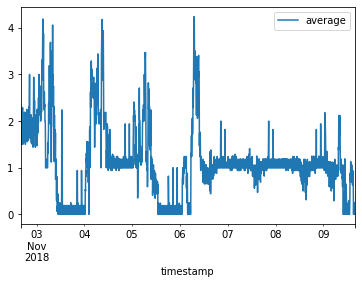

In [633]:
s=common_df.at[300, 'name']
with open(f"{data_folder}"+'/'+s) as f:
    data = json.load(f)
    df = pd.DataFrame(data['datapoints'])
    df.drop('unit',axis=1,inplace=True)
    df = df.set_index(['timestamp'])
    df.index = pd.to_datetime(df.index, unit='ms')
df.plot()

<h3>Простое экспоненциальное сглаживание <h3>

In [69]:
#def exponential_smoothing(data, alpha, n):
 #   predict = list(data[:-n])
  #  for _ in range(n):
   #     predict.append(alpha*predict[-1] + (1 - alpha) * predict[-2])
    #return predict

In [394]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

проверим как ресемплинг влияет на точность предсказаний

для начала исходная джоба с шагом 5 минут и простое экспоненциальное сглаживание, предсказываем на день

<h2>Интервалы по 5 минут</h2>

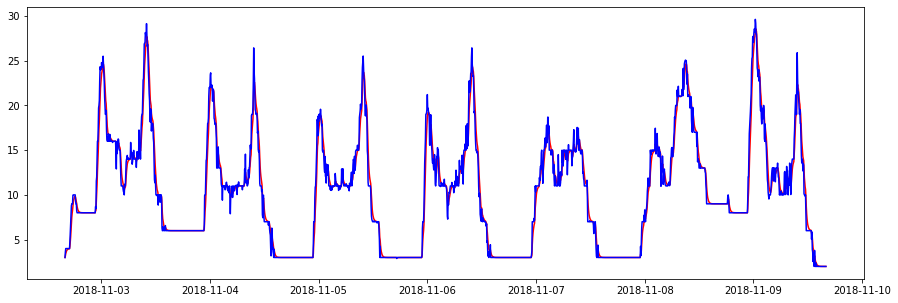

In [395]:
ex_sm=exponential_smoothing(df.average, 0.3)
ex=pd.DataFrame({'average': ex_sm}, index=df.index)
plt.figure(figsize=(15,5))
plt.plot(ex, color='red')
plt.plot(df.average[:], color='blue')


In [71]:
from sklearn.metrics import mean_squared_error

In [396]:
mean_squared_error(df.average, ex_sm)

0.9034962708604933

<h2>Интервал 15 минут</h2>

In [397]:
df_resample_15T = pd.DataFrame()
df_resample_15T['average'] = df.average.resample('15T').sum()

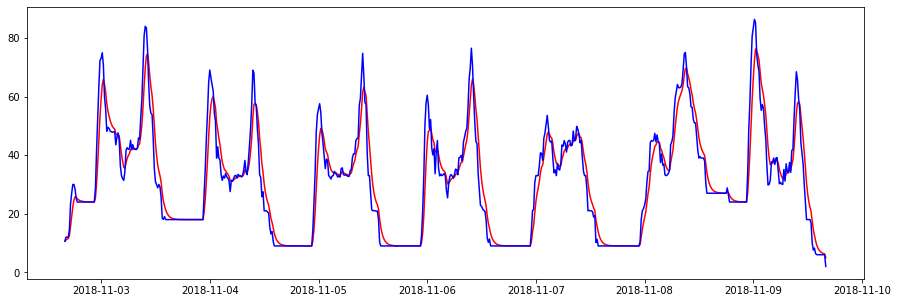

In [399]:
ex_sm1=exponential_smoothing(df_resample_15T.average, 0.3)
ex1=pd.DataFrame({'average': ex_sm1}, index=df_resample_15T.index)
plt.figure(figsize=(15,5))
plt.plot(ex1, color='red')
plt.plot(df_resample_15T.average[:], color='blue')

In [400]:
mean_squared_error(df_resample_15T.average, ex_sm1)

31.735455028827726

In [401]:
df_resample_15T = pd.DataFrame()
df_resample_15T['average'] = df.average.resample('15T').mean()

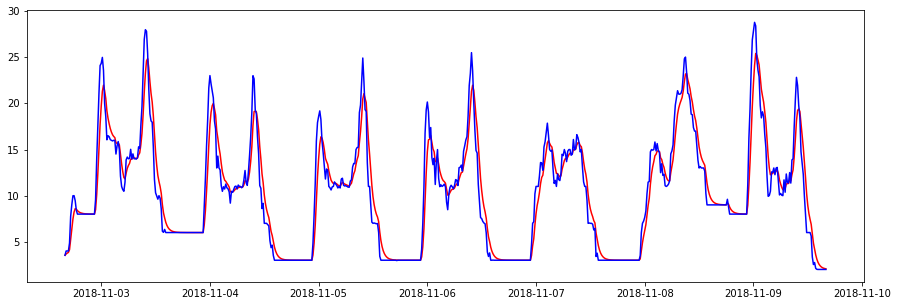

In [403]:
ex_sm1=exponential_smoothing(df_resample_15T.average, 0.3)
ex1=pd.DataFrame({'average': ex_sm1}, index=df_resample_15T.index)
plt.figure(figsize=(15,5))
plt.plot(ex1, color='red')
plt.plot(df_resample_15T.average[:], color='blue')

In [404]:
mean_squared_error(df_resample_15T.average, ex_sm1)

3.5246891088164247

<h2>Интервал 30 минут</h2>

In [405]:
df_resample_30T = pd.DataFrame()
df_resample_30T['average'] = df.average.resample('30T').mean()

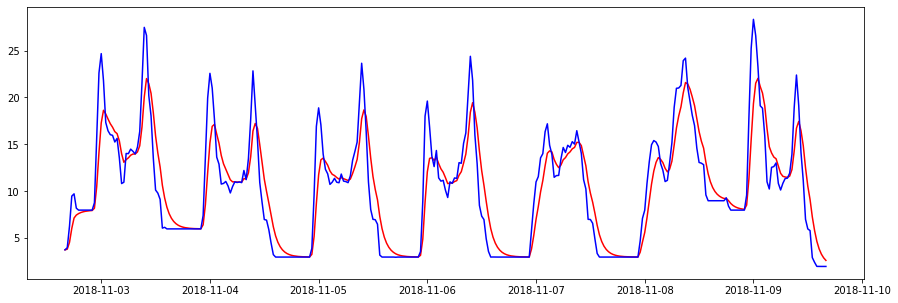

In [407]:
ex_sm2=exponential_smoothing(df_resample_30T.average, 0.3)
ex2=pd.DataFrame({'average': ex_sm2}, index=df_resample_30T.index)
plt.figure(figsize=(15,5))
plt.plot(ex2, color='red')
plt.plot(df_resample_30T.average[:], color='blue')

In [408]:
mean_squared_error(ex_sm2, df_resample_30T.average)

7.254342849017967

<h1>Интервал 60 минут</h1>

In [634]:
df_resample_60T = pd.DataFrame()
df_resample_60T['average'] = df.average.resample('60T').mean()

In [635]:
ex_sm3=exponential_smoothing(df_resample_60T.average, 0.3)

In [636]:
ex3=pd.DataFrame({'average': ex_sm3}, index=df_resample_60T.index)

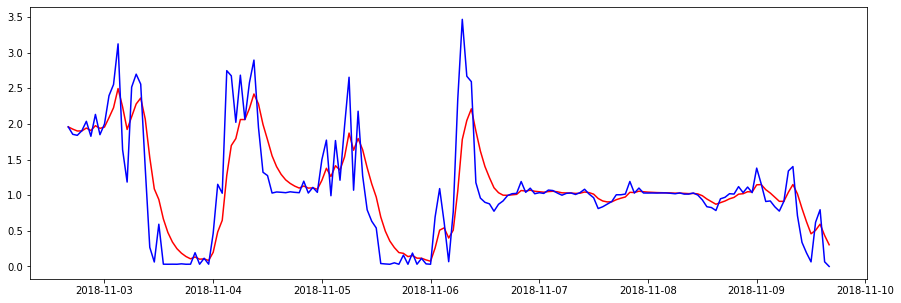

In [637]:
plt.figure(figsize=(15,5))
plt.plot(ex3, color='red')
plt.plot(df_resample_60T.average[:], color='blue')

In [587]:
mean_squared_error(ex_sm3,df_resample_60T)

1.6365613029928985

<h2>1.5 часа</h2>

In [415]:
df_resample_90T = pd.DataFrame()
df_resample_90T['average'] = df.average.resample('90T').mean()

In [417]:
ex_sm4=exponential_smoothing(df_resample_90T.average, 0.3)

In [418]:
ex4=pd.DataFrame({'average': ex_sm4}, index=df_resample_90T.index)

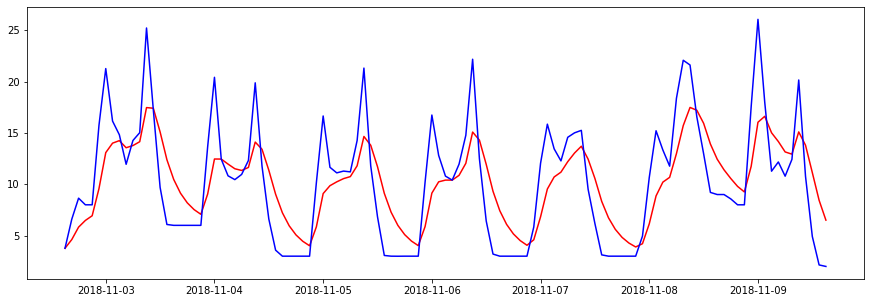

In [419]:
plt.figure(figsize=(15,5))
plt.plot(ex4, color='red')
plt.plot(df_resample_90T.average, color='blue')


In [420]:
mean_squared_error(df_resample_90T, ex_sm4)

14.739366484532725

<h2>2 часа</h2>

In [421]:
df_resample_120T = pd.DataFrame()
df_resample_120T['average'] = df.average.resample('120T').mean()

In [423]:
ex_sm5=exponential_smoothing(df_resample_120T.average, 0.3)

In [424]:
ex5=pd.DataFrame({'average': ex_sm5}, index=df_resample_120T.index)

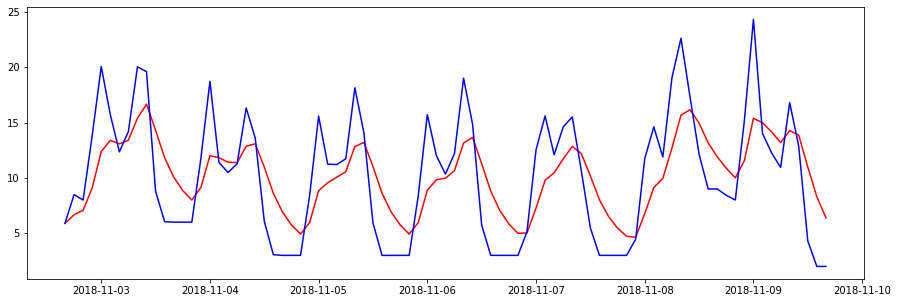

In [425]:
plt.figure(figsize=(15,5))
plt.plot(ex5, color='red')
plt.plot(df_resample_120T.average[:], color='blue')

In [426]:
mean_squared_error(df_resample_120T, ex_sm5)

15.000415131290513

    MSE с каждым ресемплингом становится больше, при уменьшении предсказываемого окна она ожидаемо уменьшается, но все равно,самый лучший результат без ресемплинга

<h1>попробуем ARIMA</h1>

проверим ряд на стационарность

In [566]:
from statsmodels.tsa.stattools import adfuller
#adf_test=ADFTest(alpha=0.05)
#adf_test.should_diff(df_resample_60T)

In [567]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(series):
    result=adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [638]:
adfuller_test(df_resample_60T.average)

ADF Test Statistic : -4.373795834818392
p-value : 0.00033018466201642553
#Lags Used : 6
Number of Observations Used : 162
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [534]:
df_resample_60T['first_diff']=df_resample_60T['average']-df_resample_60T['average'].shift(24)

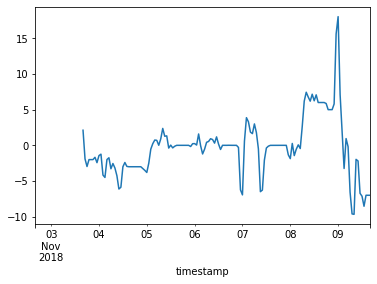

In [547]:
df_resample_60T.first_diff.plot()

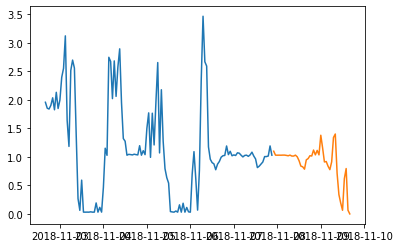

In [639]:
train,test=train_test_split(df_resample_60T.average, shuffle=False)
plt.plot(train)
plt.plot(test)

подготовка:
1.привести ряд к стационарному виду(продифференцировать если нужно, подобрать параметр d)
2.подобрать параметр AR()

In [ ]:
p

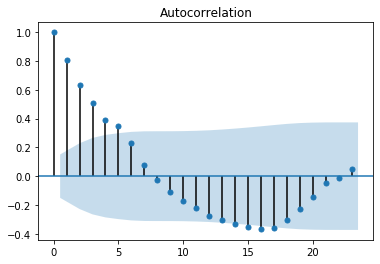

In [640]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_resample_60T.average)
plt.show()

при использовании усредненных рядов в некоторых случаях получается избавится от сезонности, но в то же время падает точность предсказания

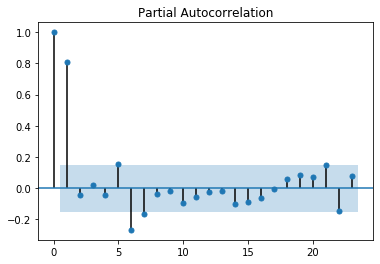

In [641]:
from statsmodels.graphics.tsaplots import plot_pacf
series = df_resample_60T.average
plot_pacf(series)#lags=50
plt.show()

Подберем параметры для нашей модели

In [642]:
from pmdarima.arima import auto_arima
arima_model=auto_arima(train, seasonal=True,
                       start_p=0, start_q=0, max_p=5, max_q=5,
                  trace=True, random_state=20, suppress_warnings=True, error_action='ignore',stepwice=True)
arima_model

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=310.933, BIC=316.606, Time=0.031 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=177.403, BIC=185.912, Time=0.069 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=226.504, BIC=235.013, Time=0.059 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=446.327, BIC=449.164, Time=0.008 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=179.324, BIC=190.669, Time=0.054 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=179.325, BIC=190.670, Time=0.067 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=178.309, BIC=192.490, Time=0.238 seconds
Total fit time: 0.534 seconds


ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

используем SARIMA, т.к. там есть средства чтобы бороться с сезонностью

In [643]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 0, 24)).fit()
pred = mod.predict(start=test.index[0], end=test.index[-1])

In [518]:
print(pred)

2018-11-07 22:00:00    3.000001
2018-11-07 22:05:00    3.000002
2018-11-07 22:10:00    3.000003
2018-11-07 22:15:00    3.000004
2018-11-07 22:20:00    3.000006
                         ...   
2018-11-09 15:40:00    3.000011
2018-11-09 15:45:00    3.000011
2018-11-09 15:50:00    3.000011
2018-11-09 15:55:00    3.000011
2018-11-09 16:00:00    3.000011
Freq: 5T, Length: 505, dtype: float64


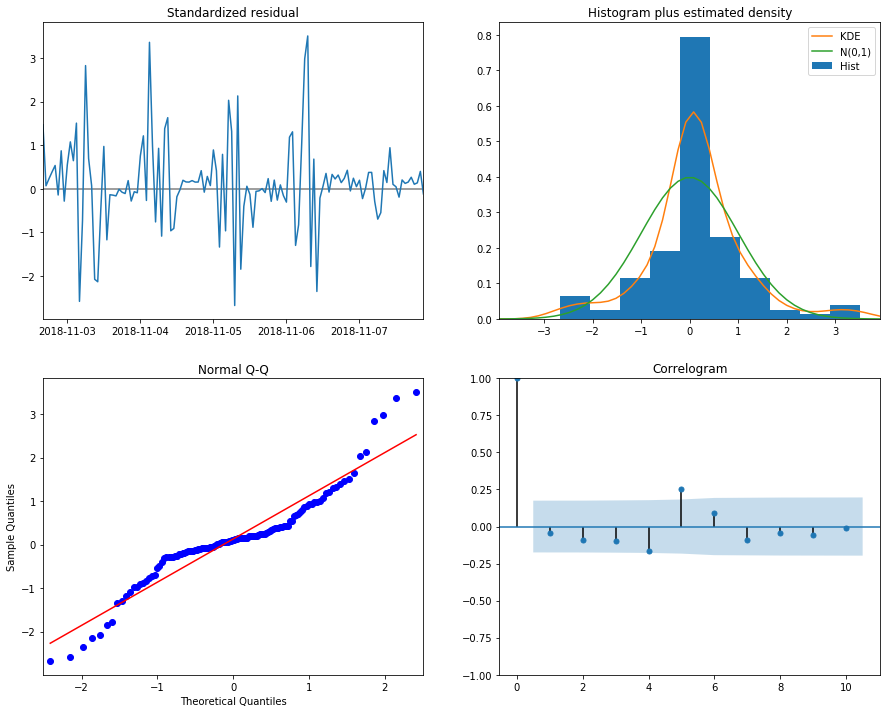

In [644]:
mod.plot_diagnostics(figsize=(15,12))
plt.show()

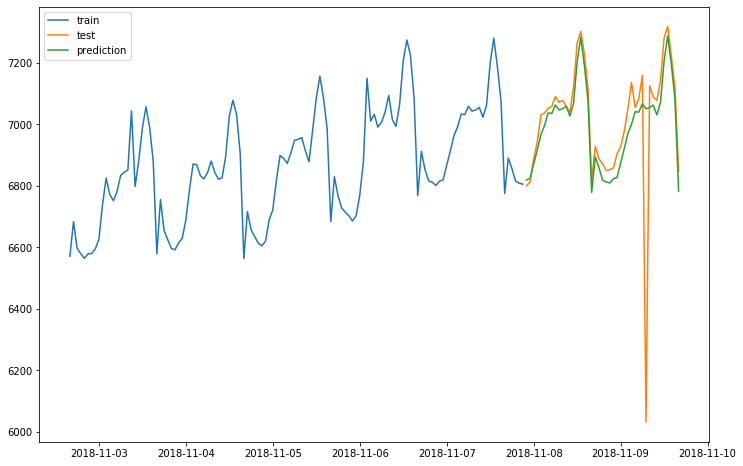

In [618]:
plt.figure(figsize=(12,8))
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(pred, label='prediction')
plt.legend(loc='best')
plt.show()

In [619]:

#test['predicted_average']=prediction
r2_score(test,pred)

0.3705992847210485

In [327]:

#from statsmodels.tsa.stattools import adfuller
#from numpy import log
#result = adfuller(df.average)
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])

<h2>модель Хольта-Винтерса</h2>

In [427]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [620]:
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=24, damped=True)
hw_model = model.fit(optimized=True, use_boxcox=False, remove_bias=False)
hw_pred = hw_model.predict(start=test.index[0], end=test.index[-1])

C:\Users\Svetlana\anaconda33\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Svetlana\anaconda33\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


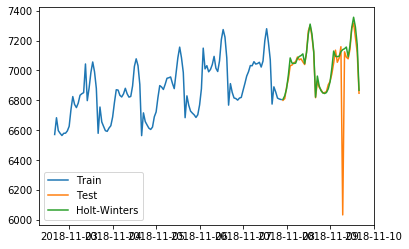

In [621]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(hw_pred.index, hw_pred, label='Holt-Winters')
plt.legend(loc='best')

In [467]:
def model_eval(y, predictions):

    # Import library for metrics
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    # Mean absolute error (MAE)
    mae = mean_absolute_error(y, predictions)

    # Mean squared error (MSE)
    mse = mean_squared_error(y, predictions)


    # SMAPE is an alternative for MAPE when there are zeros in the testing data. It
    # scales the absolute percentage by the sum of forecast and observed values
    SMAPE = np.mean(np.abs((y - predictions) / ((y + predictions)/2))) * 100


    # Calculate the Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y, predictions))

    # Calculate the Mean Absolute Percentage Error
    # y, predictions = check_array(y, predictions)
    MAPE = np.mean(np.abs((y - predictions) / y)) * 100

    # mean_forecast_error
    mfe = np.mean(y - predictions)

    # NMSE normalizes the obtained MSE after dividing it by the test variance. It
    # is a balanced error measure and is very effective in judging forecast
    # accuracy of a model.

    # normalised_mean_squared_error
    NMSE = mse / (np.sum((y - np.mean(y)) ** 2)/(len(y)-1))


    # theil_u_statistic
    # It is a normalized measure of total forecast error.
    error = y - predictions
    mfe = np.sqrt(np.mean(predictions**2))
    mse = np.sqrt(np.mean(y**2))
    rmse = np.sqrt(np.mean(error**2))
    theil_u_statistic =  rmse / (mfe*mse)


    # mean_absolute_scaled_error
    # This evaluation metric is used to over come some of the problems of MAPE and
    # is used to measure if the forecasting model is better than the naive model or
    # not.


    # Print metrics
    print('Mean Absolute Error:', round(mae, 3))
    print('Mean Squared Error:', round(mse, 3))
    print('Root Mean Squared Error:', round(rmse, 3))
    print('Mean absolute percentage error:', round(MAPE, 3))
    print('Scaled Mean absolute percentage error:', round(SMAPE, 3))
    print('Mean forecast error:', round(mfe, 3))
    print('Normalised mean squared error:', round(NMSE, 3))
    print('Theil_u_statistic:', round(theil_u_statistic, 3))

In [622]:
model_eval(test, hw_pred)

Mean Absolute Error: 48.29
Mean Squared Error: 7016.777
Root Mean Squared Error: 171.471
Mean absolute percentage error: 0.746
Scaled Mean absolute percentage error: 0.709
Mean forecast error: 7055.144
Normalised mean squared error: 0.682
Theil_u_statistic: 0.0


In [623]:
model_eval(test,pred)

Mean Absolute Error: 65.287
Mean Squared Error: 7016.777
Root Mean Squared Error: 162.849
Mean absolute percentage error: 0.983
Scaled Mean absolute percentage error: 0.955
Mean forecast error: 6998.601
Normalised mean squared error: 0.615
Theil_u_statistic: 0.0
